In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

In [4]:
# Data Preparation: 20 news group data 
categories = ['alt.atheism',
        'talk.religion.misc',
        'comp.graphics',
        'sci.space']

remove = ('headers', 'footers', 'quotes')

data_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove, shuffle=True, random_state=42)
data_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove, shuffle=True, random_state=42)

Y_train, Y_test = data_train.target, data_test.target

X_train = data_train.data
X_test = data_test.data

vectorizer = TfidfVectorizer(stop_words='english')

X_train = vectorizer.fit_transform(X_train) 
X_test = vectorizer.transform(X_test)
n_features = X_train.shape[1] # Number of columns or X Variables, also could be called P

In [5]:
print(X_train)

  (0, 21025)	0.1458931413020125
  (0, 3998)	0.07036762966055367
  (0, 5546)	0.1458931413020125
  (0, 10605)	0.16717988448915072
  (0, 20973)	0.09485258934884024
  (0, 19841)	0.06346990252225734
  (0, 2408)	0.0740617740444856
  (0, 14706)	0.046643803845554874
  (0, 20977)	0.09029017643192268
  (0, 23828)	0.2258173261964949
  (0, 21208)	0.10761272733713331
  (0, 15301)	0.1064966894139308
  (0, 21084)	0.06206087717654851
  (0, 9848)	0.1064966894139308
  (0, 22878)	0.11143515786946494
  (0, 13023)	0.13924444936699948
  (0, 14154)	0.04763446792799959
  (0, 8554)	0.10162931867025875
  (0, 18949)	0.13313300331371947
  (0, 18704)	0.10260670288726481
  (0, 19066)	0.4152868172245007
  (0, 17464)	0.22287031573892988
  (0, 18699)	0.0823823626717928
  (0, 7698)	0.11451045447542962
  (0, 11203)	0.07006583621645067
  :	:
  (2032, 5893)	0.0865825827883191
  (2032, 11856)	0.058644602949810304
  (2032, 3463)	0.07548272575460073
  (2032, 3834)	0.06627380676073108
  (2032, 11291)	0.04827424514898305
  (20

In [7]:
# Defining parameters
n_estimators_range = [10, 50, 100, 250, 500]
param_grid = {'n_estimators': n_estimators_range}

In [8]:
# Scorer
scorer = make_scorer(accuracy_score)

# Random Forest with GridSearchCV
rf = RandomForestClassifier(max_features=int(np.sqrt(n_features)), min_samples_split=2, max_depth=None, n_jobs=-1)
rf_grid = GridSearchCV(rf, param_grid, scoring=scorer, cv=3)
rf_grid.fit(X_train, Y_train)
rf_errors = [1 - mean_test_score for mean_test_score in rf_grid.cv_results_['mean_test_score']]

# Gradient Boosting with GridSearchCV
gb = GradientBoostingClassifier(learning_rate=0.5, max_depth=2)
gb_grid = GridSearchCV(gb, param_grid, scoring=scorer, cv=3)
gb_grid.fit(X_train, Y_train)
gb_errors = [1 - mean_test_score for mean_test_score in gb_grid.cv_results_['mean_test_score']]

In [15]:
rf_errors

[0.31514257620452313,
 0.25122910521140607,
 0.24532940019665694,
 0.23156342182890854,
 0.23746312684365778]

In [16]:
gb_errors

[0.34906588003933137,
 0.2989183874139627,
 0.2817109144542772,
 0.2635201573254671,
 0.26843657817109146]

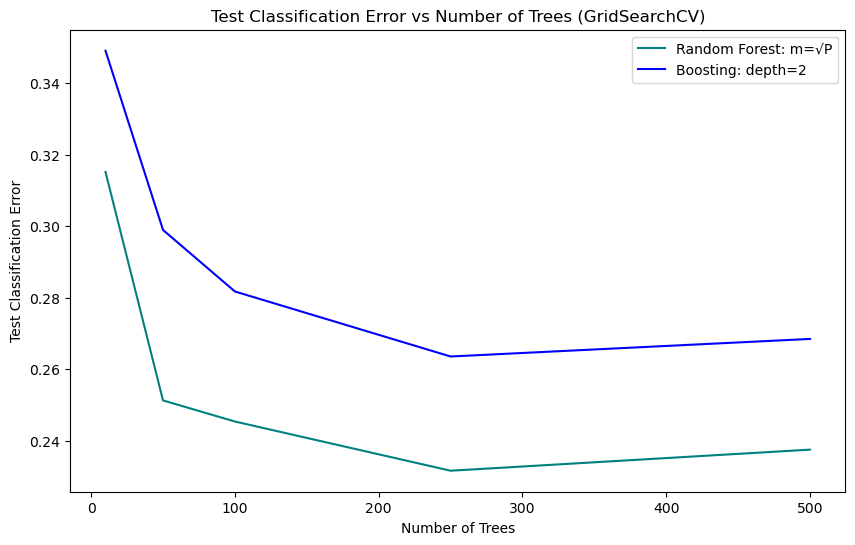

In [9]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, rf_errors, label='Random Forest: m=√P', color='teal')
plt.plot(n_estimators_range, gb_errors, label='Boosting: depth=2', color='blue')
plt.xlabel('Number of Trees')
plt.ylabel('Test Classification Error')
plt.title('Test Classification Error vs Number of Trees (GridSearchCV)')
plt.legend()
plt.show()

In [ ]:
# I wanted to expand the range of the n_estimators 
# but was not able to because of the time constraint with the running time.

# I can run the code with a larger range of n_estimators if needed and submit again.